In [1]:
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [2]:
city = "Sicklerville"
content = "user"

df = pd.read_csv(f'../filtered_cities/{city}_{content}.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3078 entries, 0 to 3077
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             3078 non-null   object 
 1   name                3077 non-null   object 
 2   review_count        3078 non-null   int64  
 3   yelping_since       3078 non-null   object 
 4   useful              3078 non-null   int64  
 5   funny               3078 non-null   int64  
 6   cool                3078 non-null   int64  
 7   elite               245 non-null    object 
 8   friends             1873 non-null   object 
 9   fans                3078 non-null   int64  
 10  average_stars       3078 non-null   float64
 11  compliment_hot      3078 non-null   int64  
 12  compliment_more     3078 non-null   int64  
 13  compliment_profile  3078 non-null   int64  
 14  compliment_cute     3078 non-null   int64  
 15  compliment_list     3078 non-null   int64  
 16  compli

In [13]:
df['friends'].fillna(value='[]', inplace=True)

In [14]:
df.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,RgDVC3ZUBqpEe6Y1kPhIpw,Monica,1282,2009-02-23 14:08:31,12640,10005,11149,"2009,2010,2011,2012,2013,2014,2015,2016","sHozd2pcOKwHtPr8VlZJfg, 7mL9cvICl8fuCQTM89a-SA...",804,...,102,108,138,65,898,2584,1731,1731,551,177
1,zkamNMEjihh3zN7lC7_WVw,Matthew,15,2006-02-04 15:53:46,35,4,22,NaN,"YLzb3jjc3p-XAOBRggcrgA, 9lcq01JUhRY2yW8AxU3TIA...",1,...,1,0,0,0,1,3,2,2,0,0
2,gVFxZMcuG_Tal2_TnpmUPg,Stephanie,146,2008-05-05 00:16:33,347,100,124,"2011,2012,2013,2014,2015,2016","uUh_q6rVMhKxwt0eaiphRg, jRqWx2z7jdSzpvqqswqNnw...",6,...,13,1,0,0,10,8,21,21,8,0
3,g0_x4kVvJAYuk96oCcbOmw,Michael,455,2009-04-15 12:46:06,1823,696,663,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2018","_BcWyKQL16ndpBdggh2kNA, mx50KP6rXgutH36fhnL6Vw...",46,...,11,0,1,5,39,33,57,57,32,8
4,-NbeVN5tnwdyYAvdNkKMjw,Dominic,1101,2012-04-25 19:31:00,6704,1959,4179,"2012,2013,2014,2015,2016,2017,2018,2019,20,20,...","9IRuYmy5YmhtNQ6ei1p-uQ, 6NvkQATK0J2nmEWsuzhHig...",193,...,33,18,2,2,312,457,637,637,137,63


In [15]:
df.duplicated().sum()

0

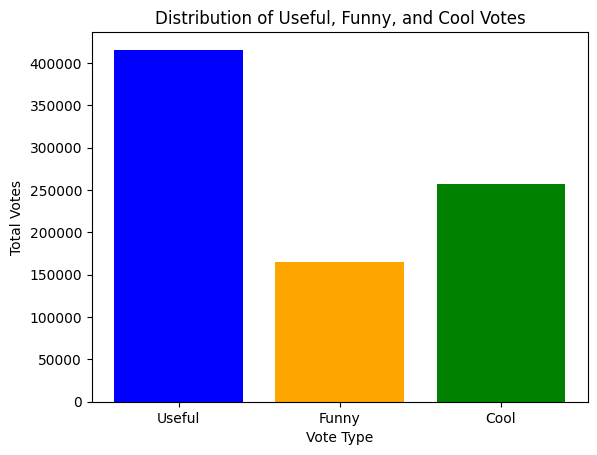

In [16]:
total_useful = df['useful'].sum()
total_funny = df['funny'].sum()
total_cool = df['cool'].sum()
totals = {'Useful': total_useful, 'Funny': total_funny, 'Cool': total_cool}

plt.bar(totals.keys(), totals.values(), color=['blue', 'orange', 'green'])
plt.title('Distribution of Useful, Funny, and Cool Votes')
plt.xlabel('Vote Type')
plt.ylabel('Total Votes')
plt.show()

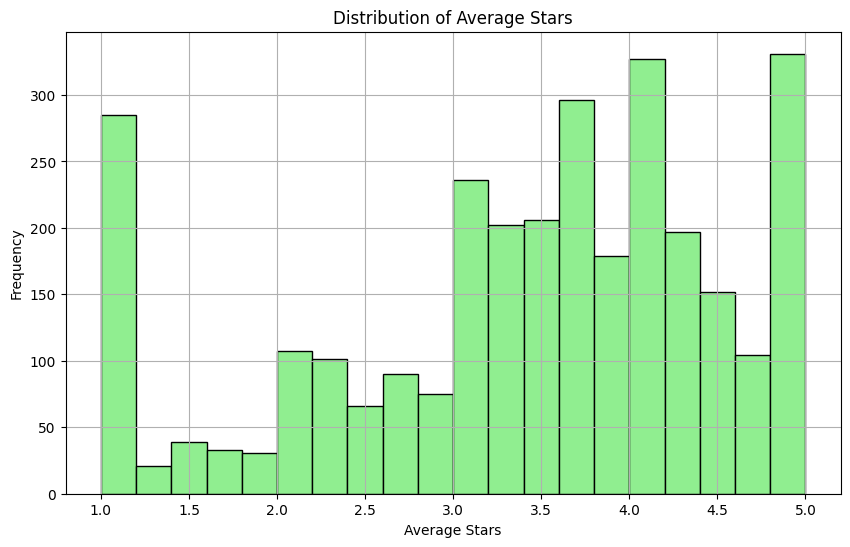

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(df['average_stars'], bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Average Stars')
plt.ylabel('Frequency')
plt.title('Distribution of Average Stars')
plt.grid(True)
plt.show()

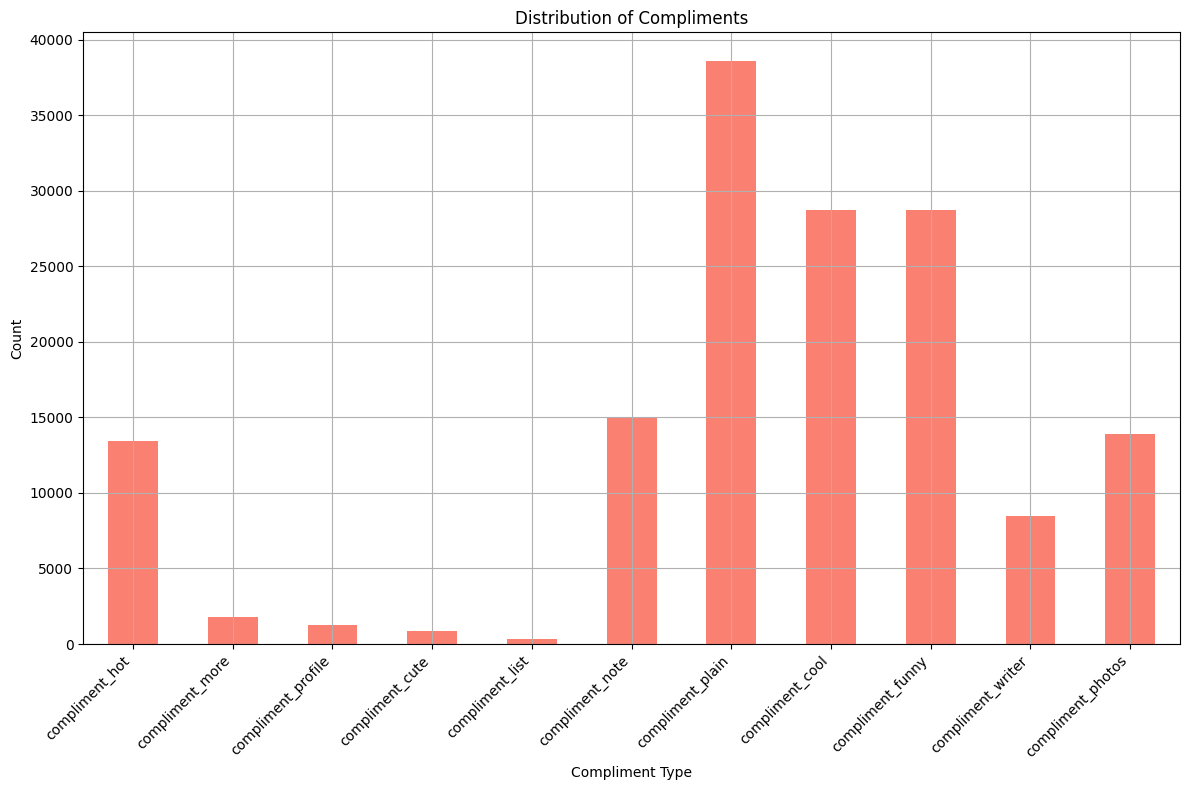

In [18]:
compliment_cols = [col for col in df.columns if 'compliment' in col]
total_compliments = df[compliment_cols].sum()

plt.figure(figsize=(12, 8))
total_compliments.plot(kind='bar', color='salmon')
plt.xlabel('Compliment Type')
plt.ylabel('Count')
plt.title('Distribution of Compliments')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

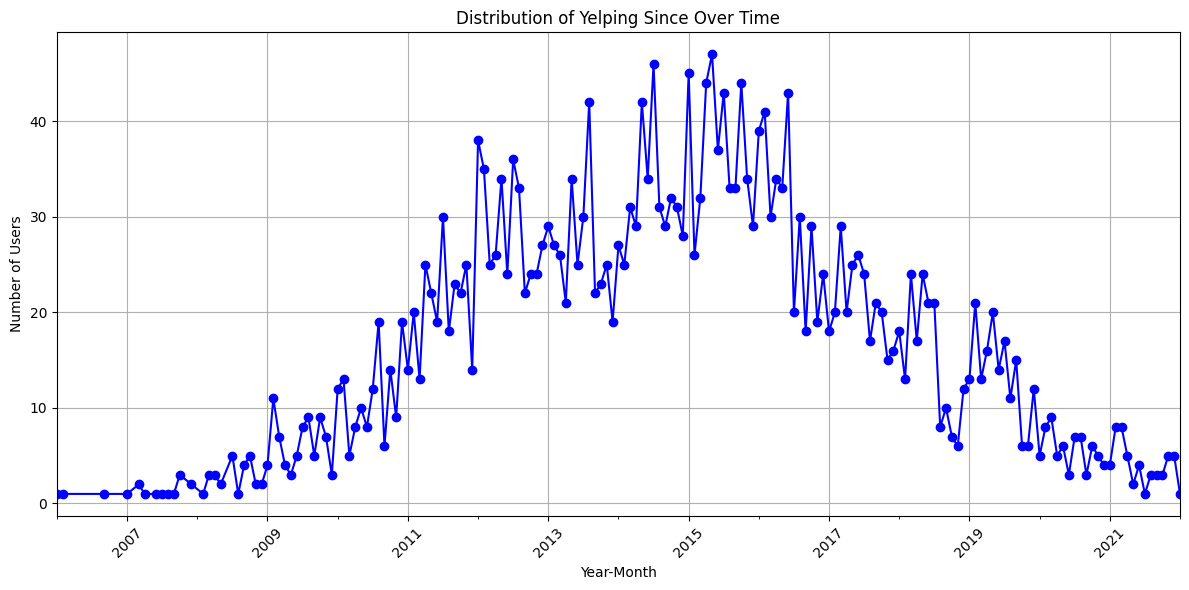

In [19]:
df['yelping_since'] = pd.to_datetime(df['yelping_since'])
yelping_counts = df.groupby(df['yelping_since'].dt.to_period('M')).size()

plt.figure(figsize=(12, 6))
yelping_counts.plot(color='blue', marker='o', linestyle='-')
plt.xlabel('Year-Month')
plt.ylabel('Number of Users')
plt.title('Distribution of Yelping Since Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

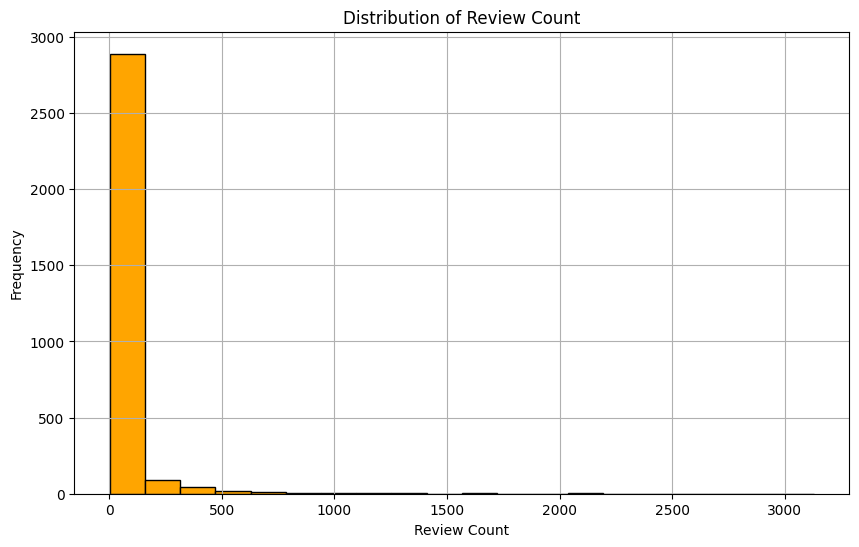

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(df['review_count'], bins=20, color='orange', edgecolor='black')
plt.xlabel('Review Count')
plt.ylabel('Frequency')
plt.title('Distribution of Review Count')
plt.grid(True)
plt.show()

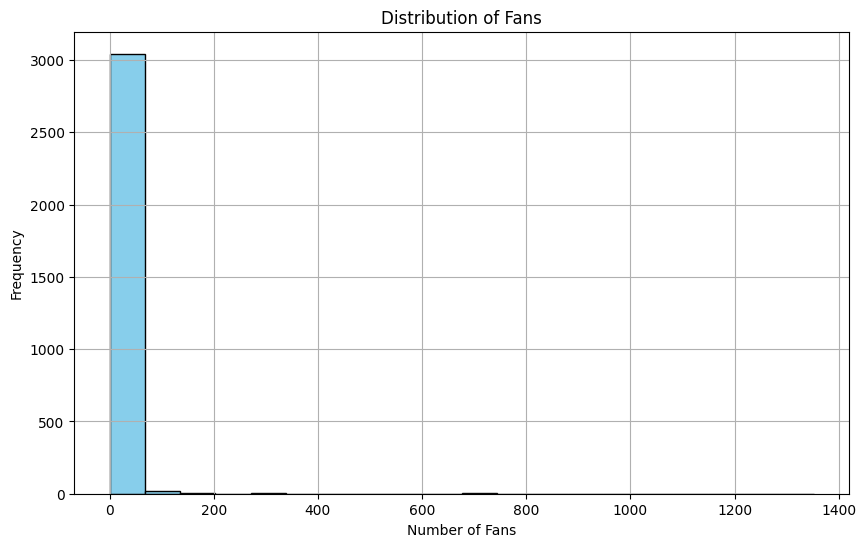

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(df['fans'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Number of Fans')
plt.ylabel('Frequency')
plt.title('Distribution of Fans')
plt.grid(True)
plt.show()

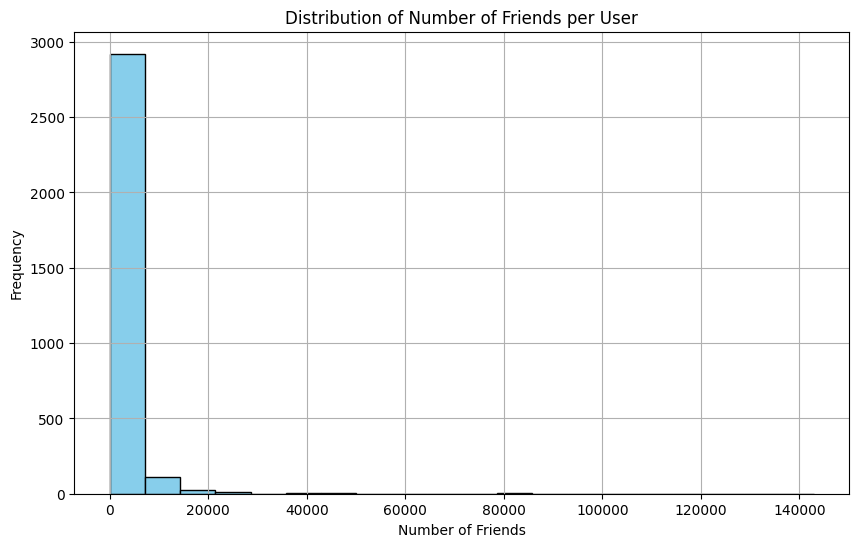

In [22]:
df['num_friends'] = df['friends'].apply(len)

plt.figure(figsize=(10, 6))
plt.hist(df['num_friends'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Number of Friends')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Friends per User')
plt.grid(True)
plt.show()